In [1]:
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn # or alternatively plt.style.use('ggplot') for a similar look

matplotlib.rc("figure", figsize=(8,6))
matplotlib.rc("axes", labelsize=16, titlesize=16)
matplotlib.rc("xtick", labelsize=14)
matplotlib.rc("ytick", labelsize=14)
matplotlib.rc("legend", fontsize=14)
matplotlib.rc("font", size=14)

In [3]:
import numpy as np
import collections
import pandas as pd

## Bar Charts

In [ ]:
data = np.random.permutation(np.array(["dog"]*10 + ["cat"]*7 + ["rabbit"]*3))
counts = collections.Counter(data)
plt.bar(range(len(counts)), counts.values())
plt.xticks(np.arange(len(counts))+0.4, counts.keys());
plt.ylabel("Count")
plt.xlabel("Animal");
plt.savefig("barchart.pdf")

## Pie Charts

In [ ]:
plt.pie(counts.values(), labels=counts.keys(), autopct='%1.1f%%', 
        colors=["yellowgreen", "lightskyblue", "gold"])
plt.axis('equal');
plt.savefig("piechart.pdf")

## Histograms

In [ ]:
data = np.random.randn(10000)
plt.hist(data, bins=50);
plt.xlabel("Value")
plt.ylabel("Count")
plt.savefig("histogram.pdf")

## Scatter plot

In [ ]:
x = np.random.randn(1000)
y = 0.4*x**2 + x + 0.7*np.random.randn(1000)
plt.plot(x,y,'.')
plt.xlabel("Value 1")
plt.ylabel("Value 2")
plt.savefig("scatter.pdf")

## Line plot

In [ ]:
x = np.linspace(0,10,1000)
y = np.cumsum(0.01*np.random.randn(1000))
plt.plot(x,y,'-')
plt.xlabel("Time")
plt.ylabel("Value")
plt.savefig("line.pdf")

## Box and whisker plot

ValueError: List of boxplot statistics and `positions` values must have same the length

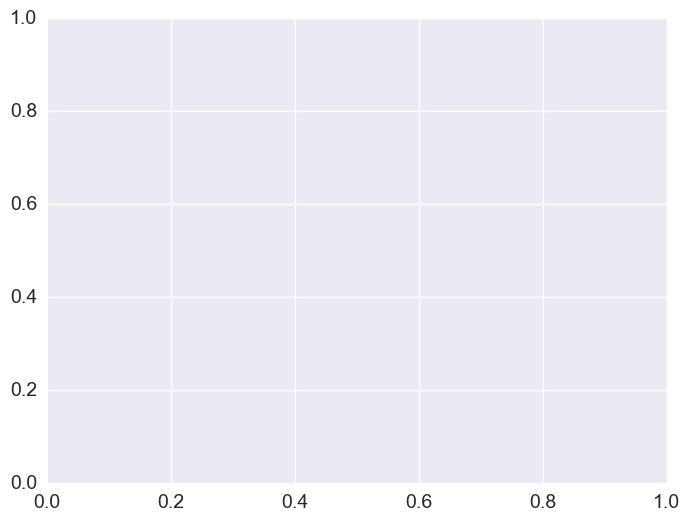

In [4]:
category = np.random.choice(['dog','cat','rabbit'], 2000, p=[0.5,0.3,0.2])
weights = np.zeros_like(category, dtype=np.float64)
weights[category=="dog"] = 30 + 5*np.random.randn(np.sum(category=="dog"))
weights[category=="cat"] = 18 + 3*np.random.randn(np.sum(category=="cat"))
weights[category=="rabbit"] = 16 + 4*np.random.randn(np.sum(category=="rabbit"))

labels = collections.Counter(category).keys()
data = [weights[category==l] for l in labels]
# seaborn doesn't capture the plt.boxplot command
seaborn.boxplot(data, whis=[1,99], showfliers=True);
plt.xticks(np.arange(len(labels))+1, labels);
plt.ylabel("Weight")
plt.xlabel("Animal")
plt.savefig("boxplot.pdf")

## Heatmap (2D histogram version)

In [ ]:
x = np.random.randn(100000)
y = 0.4*x**2 + x + 0.7*np.random.randn(100000)
plt.hist2d(x, y, bins=100);
plt.set_cmap(plt.cm.get_cmap('hot'))
plt.grid(False)
plt.ylim([-3,8])
plt.xlabel("Value 1")
plt.ylabel("Value 2")
plt.savefig("hist2d.pdf")

## Heatmap (matrix version)

In [ ]:
category2 = np.zeros_like(category)
category2[category=="dog"] = np.random.choice(['dog','cat','rabbit'], np.sum(category=="dog"), p=[0.8,0.05,0.15])
category2[category=="cat"] = np.random.choice(['dog','cat','rabbit'], np.sum(category=="cat"), p=[0.2,0.6,0.2])
category2[category=="rabbit"] = np.random.choice(['dog','cat','rabbit'], np.sum(category=="rabbit"), p=[0.4,0.4,0.2])

counter = collections.Counter(zip(category, category2))
labels = collections.Counter(category).keys()
M = np.array([[float(counter[(i,j)]) for i in labels] for j in labels])
M = M / np.sum(M,axis=1)[:,None]
plt.imshow(M, interpolation="Nearest", cmap="hot", vmax=1, vmin=0)
plt.grid(False)

plt.xticks(np.arange(len(labels)), labels);
plt.yticks(np.arange(len(labels)), labels);
plt.xlabel("Second Pet")
plt.ylabel("First Pet")
plt.axes().xaxis.tick_top()
plt.axes().xaxis.set_label_position("top")
plt.savefig("heatmap.pdf")

## Scatter Matrix

In [ ]:
x = np.random.randn(1000)
y = 0.4*x**2 + x + 0.7*np.random.randn(1000)
z = 0.5 + 0.2*(y-1)**2 + 0.1*np.random.randn(1000)
df = pd.DataFrame(np.array([x,y,z]).T)
seaborn.pairplot(df);
plt.savefig("scatter_matrix.pdf")

## Bubble chart

In [ ]:
plt.scatter(x, y, s=z*20, color=seaborn.color_palette()[0])
plt.xlabel("Value 1")
plt.ylabel("Value 2")
plt.savefig("bubble.pdf")

## Color scatter plot

In [ ]:
xy1 = np.random.randn(1000,2).dot(np.random.randn(2,2)) + np.random.randn(2)
xy2 = np.random.randn(1000,2).dot(np.random.randn(2,2)) + np.random.randn(2)

plt.scatter(xy1[:,0], xy1[:,1], color=seaborn.color_palette()[0])
plt.axes().scatter(xy2[:,0], xy2[:,1], color=seaborn.color_palette()[1])
plt.xlabel("Value 1")
plt.ylabel("Value 2")
plt.legend(["Class 1", "Class 2"])
plt.savefig("scatter_color.pdf")

In [ ]:
%matplotlib notebook
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot3D(x,y,z, '.')
ax.set_xlabel("Value 1")
ax.set_ylabel("Value 2")
ax.set_zlabel("Value 3");